In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [2]:
raw_data = pd.read_csv('missedpagefoundafterprefetching.csv')

raw_data

,Benchmark,TotalMiss,FoundInSameSEL1,TotalMissPrefetch,FoundInSameSEL1Prefetch,TotalMissPrefetchIntoPB,FoundInSameSEL1PrefetchIntoPB,NeighborHitRateBaseline,NeighborHitRatePrefetch,NeighborHitRatePrefetchInPB
0,mt,288512,60027,191780,3280,207055,23427,0.208057,0.017103,0.113144
1,mm,4982267,4070760,5895558,1259962,3873267,1925095,0.817050,0.213714,0.497021
2,km,3258244,2054287,2809251,185067,2420656,807472,0.630489,0.065878,0.333576
3,st,1192899,428696,1162701,24770,1129658,330410,0.359373,0.021304,0.292487
4,pr,3717912,2233522,3093561,487936,2820115,1392831,0.600746,0.157726,0.493892
5,spmv,3424285,1989034,1252015,54853,885193,347113,0.580861,0.043812,0.392133
6,flw,15157003,13330709,11610244,9839251,13859241,12219149,0.879508,0.847463,0.881661
7,fir,71157,14118,71157,14118,71157,14118,0.198406,0.198406,0.198406
8,sc,1422,598,1422,598,1422,598,0.420534,0.420534,0.420534
9,bs,192376,92896,192376,92896,192376,92896,0.482888,0.482888,0.482888


In [3]:
stacked_data = raw_data

stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['NeighborHitRateBaseline', 'NeighborHitRatePrefetch','NeighborHitRatePrefetchInPB'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data.columns = ['Benchmark', 'Configuration', 'NeighborHitRate']
stacked_data = stacked_data.reset_index()
stacked_data

,index,Benchmark,Configuration,NeighborHitRate
0,0,MT,NeighborHitRateBaseline,0.208057
1,1,MM,NeighborHitRateBaseline,0.817050
2,2,KM,NeighborHitRateBaseline,0.630489
3,3,ST,NeighborHitRateBaseline,0.359373
4,4,PR,NeighborHitRateBaseline,0.600746
5,5,SPMV,NeighborHitRateBaseline,0.580861
6,6,FLW,NeighborHitRateBaseline,0.879508
7,7,FIR,NeighborHitRateBaseline,0.198406
8,8,SC,NeighborHitRateBaseline,0.420534
9,9,BS,NeighborHitRateBaseline,0.482888


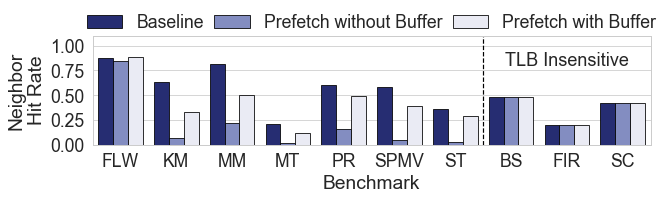

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='NeighborHitRate',
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E','#7986CB','#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels = ['Baseline', 'Prefetch without Buffer', 'Prefetch with Buffer']
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.12), loc="center", ncol=3)
ax.set_ylim(0, 1.1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_ylabel('Neighbor\nHit Rate')
# ax.text(1.25, 1.6, 2.29, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(5.25, 1.6, 8.33, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(6.25, 1.6, 10.67, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(9.25, 1.6, 2.88, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))

ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 0.85, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18)

plt.savefig('neighborhitrate.pdf', bbox_inches='tight')
plt.savefig('neighborhitrate.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()
